LinearRegressor: a simplt custom built class implementation for the regression logic.

src.shared imports: \
numpy as np \
pandas as pd \
matplotlib.pyplot as plt \
utils like load_dataset, calculating metrics, etc.

In [4]:
import sys
from pathlib import Path

project_root = str(Path.cwd().parents[1])

if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.regression.linear import LinearRegressor
from src.shared import *

I chose a simple dataset suitable for linear regression. \
The Salaries dataset fits this criterion well and is perfect for demonstrating the linear regressor.

Salary vs Experience: 0.9777


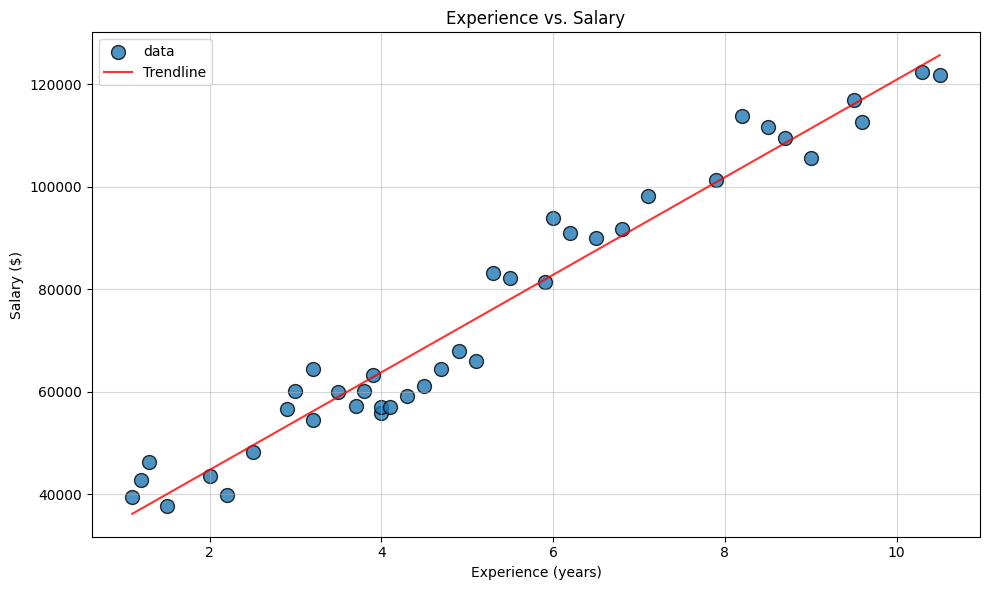

In [5]:
# --- 1. Load Data ---
df = load_dataset('salaries')


# --- 2. Data Cleaning ---
# There is no need to clean the data as it is already clean in this simple dataset.


# --- 3. Analysis ---
# Correlation Matrix (Simple 1-to-1 relationship)
correlation = df['Salary'].corr(df['Experience Years'])
print(f"Salary vs Experience: {correlation:.4f}")


# --- 4. Visualization ---
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    x=df['Experience Years'],
    y=df['Salary'],
    label="data",
    edgecolors='black', 
    alpha=0.8,
    s=100
)

plt.title("Experience vs. Salary")
plt.xlabel("Experience (years)")
plt.ylabel("Salary ($)")

# trendline
m, b = np.polyfit(df['Experience Years'], df['Salary'], 1)
plt.plot(df['Experience Years'], m*df['Experience Years'] + b, color='red', alpha=0.8, label=f'Trendline')

plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# We see an obvious linear relationship between years of experience and salary.
# Of course, do not forget you can use linear regression for more than just one feature! this particular dataset is just simple.

Training on 32 samples
Testing on 8 samples

--- Testing Results ---
On average, the model's guess is off by: $3,797.77
Error percentage: 5.38%


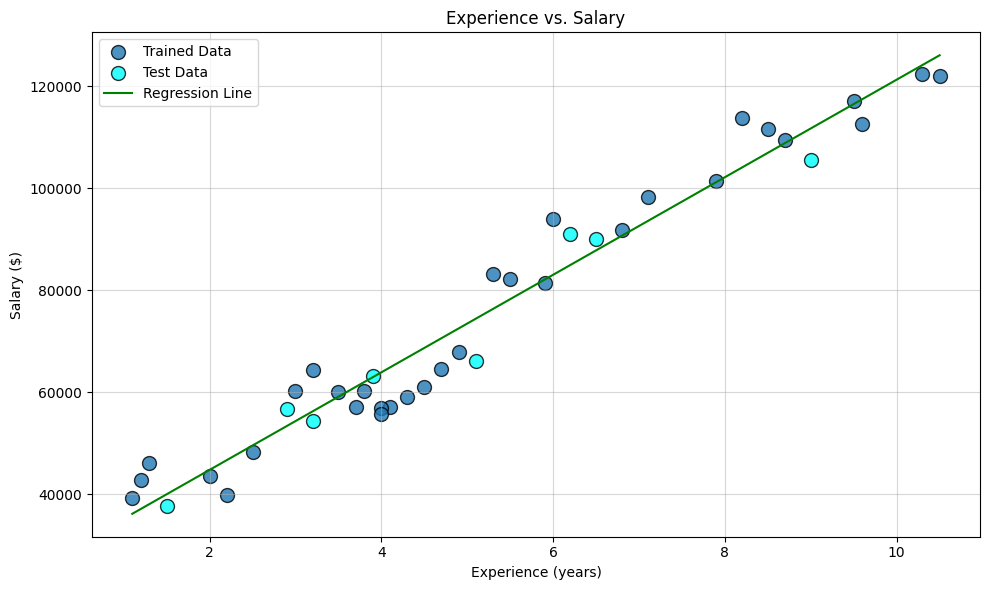

In [6]:
# --- 1. Select Features & Target ---
# Salary dataset only has one feature: 'Experience Years'
X = df[['Experience Years']].values 
y = df['Salary'].values


# --- 2. Split Data for training & testing ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)


# Normalize features to 0-1 range for better performance
train_min = X_train.min(axis=0)
train_range = X_train.max(axis=0) - train_min + 1e-15

X_train = (X_train - train_min) / train_range
X_test = (X_test - train_min) / train_range


# --- 3. Training ---
print(f"Training on {len(X_train)} samples")

model = LinearRegressor()
model.fit(X_train, y_train)


# --- 4. Evaluation ---
print(f"Testing on {len(X_test)} samples")

print("\n--- Testing Results ---")
predictions = model.predict(X_test)

mae = calculate_mae(y_test, predictions)

print(f"On average, the model's guess is off by: ${mae:,.2f}")
print(f"Error percentage: {mae / np.mean(y_test) * 100:.2f}%")


# --- 5. Visualization ---
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    x=X_train * train_range + train_min,
    y=y_train,
    label="Trained Data",
    edgecolors='black', 
    alpha=0.8,
    s=100
)

scatter = plt.scatter(
    x=X_test * train_range + train_min,
    y=y_test,
    label="Test Data",
    color='cyan',
    edgecolors='black', 
    alpha=0.8,
    s=100
)

X_line = np.linspace(0, 1, 100).reshape(-1, 1)
y_line = model.predict(X_line)

X_line_original = X_line * train_range + train_min

plt.plot(X_line_original, y_line, color='green',label='Regression Line')

plt.title("Experience vs. Salary")
plt.xlabel("Experience (years)")
plt.ylabel("Salary ($)")

plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Do not forget, linear regression can be used for multiple features as well, not just one! 
# In 2d, it's a line, in 3d it's a plane, and in higher dimensions, it's a hyperplane.